<a href="https://colab.research.google.com/github/kinderasteroid/Food-Vision-Model/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network and Computer Vision

#Get The Data

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-09-01 20:39:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   127MB/s    in 0.8s    

2023-09-01 20:39:01 (127 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import random
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()
import os
import pathlib as plib
import numpy as np

def_path = plib.Path("pizza_steak/train/")
class_name = ['pizza','steak']

def gen_image(cname):
  path = "pizza_steak/train/"+cname
  ranimg = random.sample(os.listdir(path),1)
  img = mpimg.imread(path+"/"+ranimg[0])
  plt.imshow(img)
  return img


#Inspect the Data

(384, 512, 3)

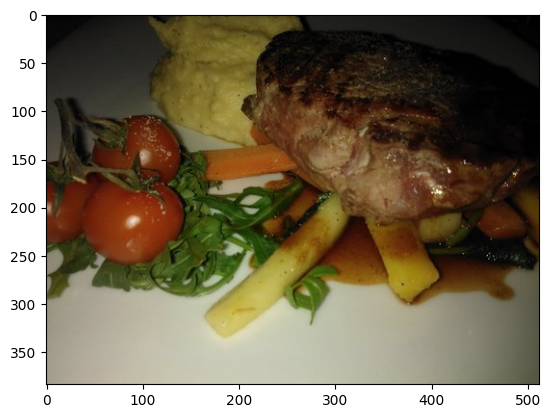

In [ ]:
img = gen_image('steak')
tf.constant(img)
img.shape


#Normalize The Data Before Passing to Tensor 🔑🔑🔑🔑🔑IMPORTANT

In [ ]:
img/255

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.63921569, 0.61568627, 0.55294118],
        [0.63921569, 0.61568627, 0.55294118],
        [0.64313725, 0

#Convolutional Neural Network

In [ ]:
 import tensorflow as tf
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

 traindatagen = ImageDataGenerator(rescale=1/255)
 validdatagen = ImageDataGenerator(rescale=1/255)

 train_dir = "/content/pizza_steak/train"
 test_dir = "/content/pizza_steak/test"

 traindata = traindatagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

 validdata = validdatagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

 model1 = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation="sigmoid")

                               ])

 model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

 model1.fit(traindata,epochs=5,steps_per_epoch=len(traindata),validation_data=validdata,validation_batch_size=len(validdata))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 122ms/step - loss: 0.6526 - accuracy: 0.6547 - val_loss: 0.5933 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.4717 - accuracy: 0.7793 - val_loss: 0.3741 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4168 - accuracy: 0.8127 - val_loss: 0.3888 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3775 - accuracy: 0.8300 - val_loss: 0.3503 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 7s 159ms/step - loss: 0.3039 - accuracy: 0.8807 - val_loss: 0.3128 - val_accuracy: 0.8780
